In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


****Kaggle - Students' Academic Performance Dataset****

[Students' Academic Performance Dataset](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data)

**Columns** 

```python
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 코스 컨텐츠에 들어온 횟수
	Viewing announcements : 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
```
)

## EDA

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


<AxesSubplot:xlabel='raisedhands', ylabel='GradeID'>

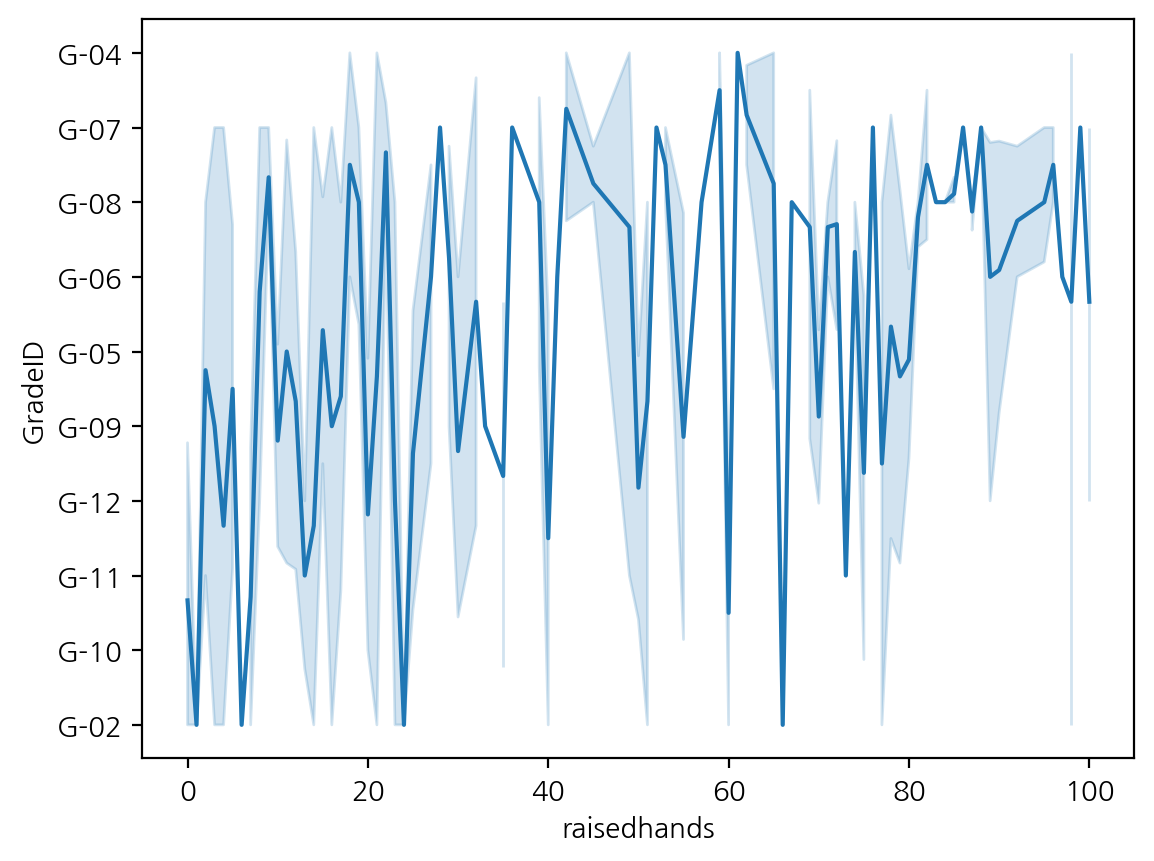

In [6]:
# 손 든 횟수별 성적 등급 시각화
sns.lineplot(data=df, x="raisedhands", y='GradeID')

array([[<AxesSubplot:title={'center':'raisedhands'}>,
        <AxesSubplot:title={'center':'VisITedResources'}>],
       [<AxesSubplot:title={'center':'AnnouncementsView'}>,
        <AxesSubplot:title={'center':'Discussion'}>]], dtype=object)

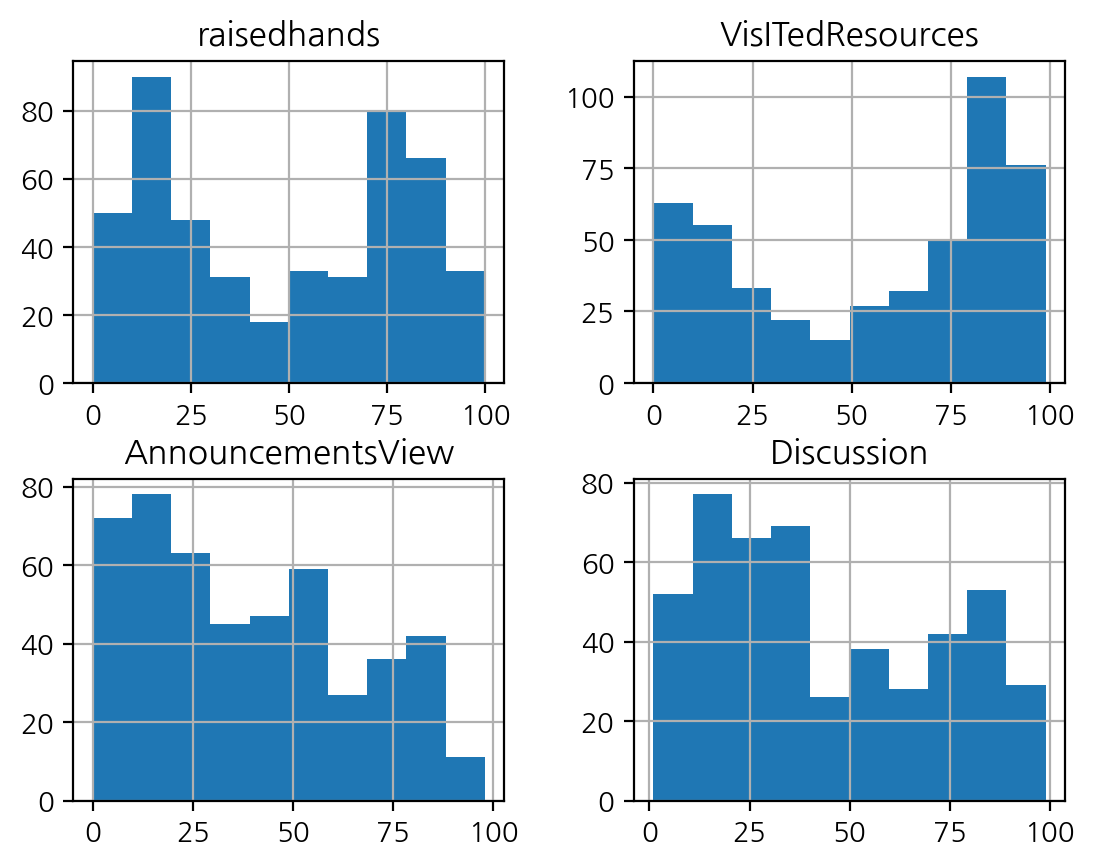

In [7]:
df.hist()

Text(0.5, 1.0, 'class별 남성 여성 수')

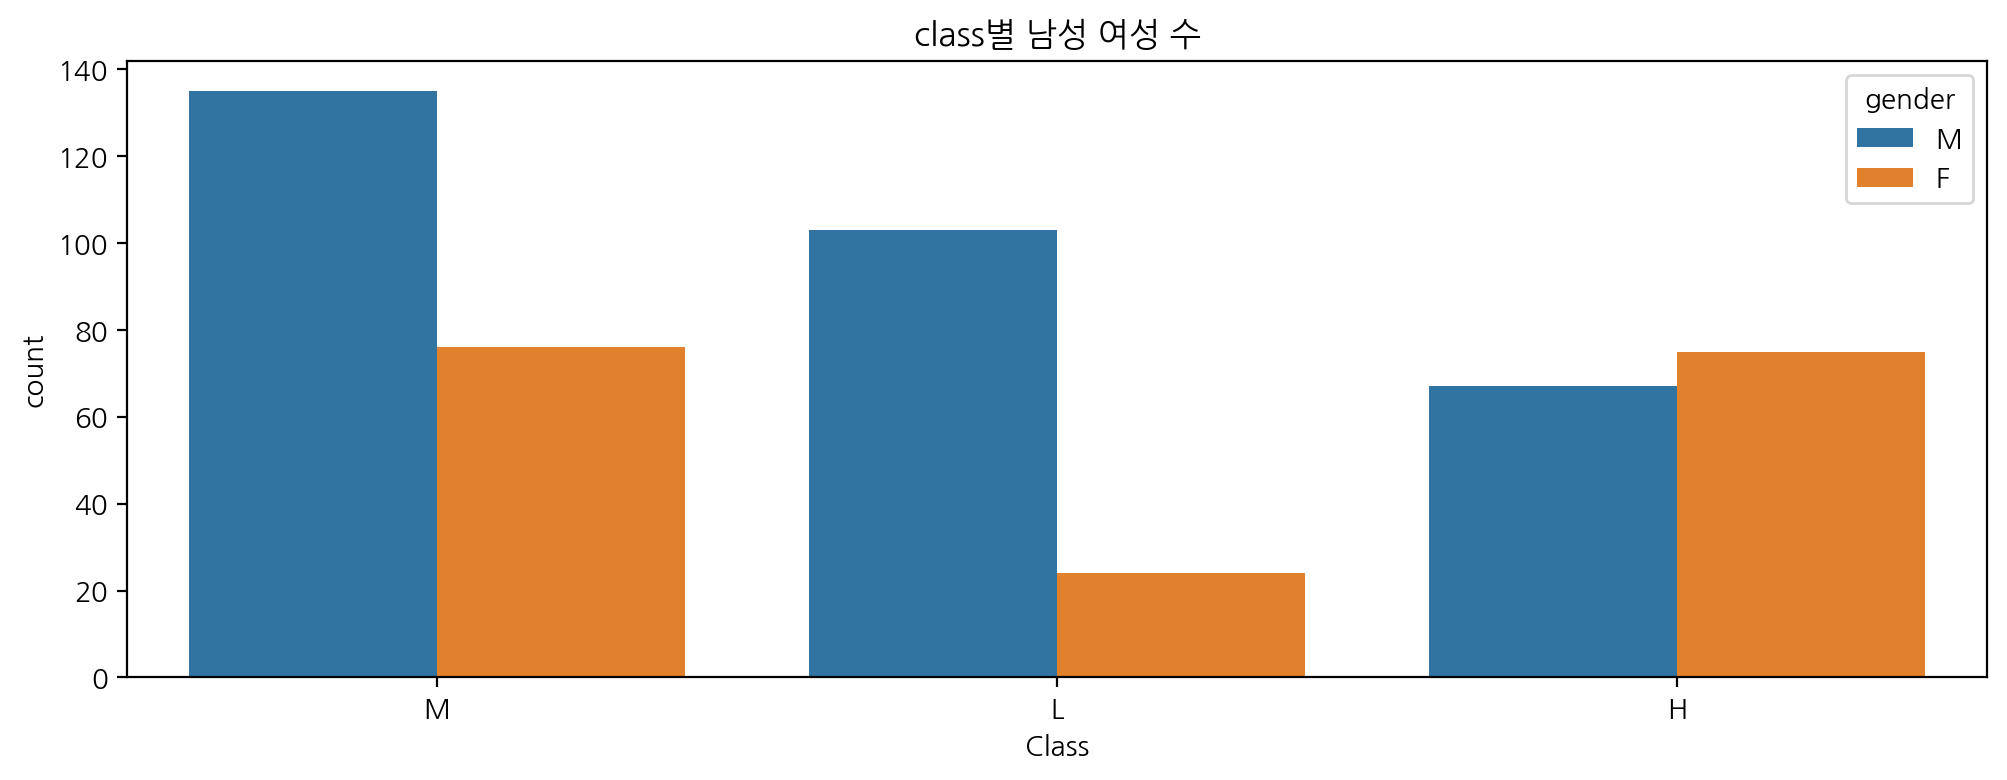

In [8]:
# 클래스별 남성 여성 수
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="Class", hue='gender').set_title("class별 남성 여성 수")

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

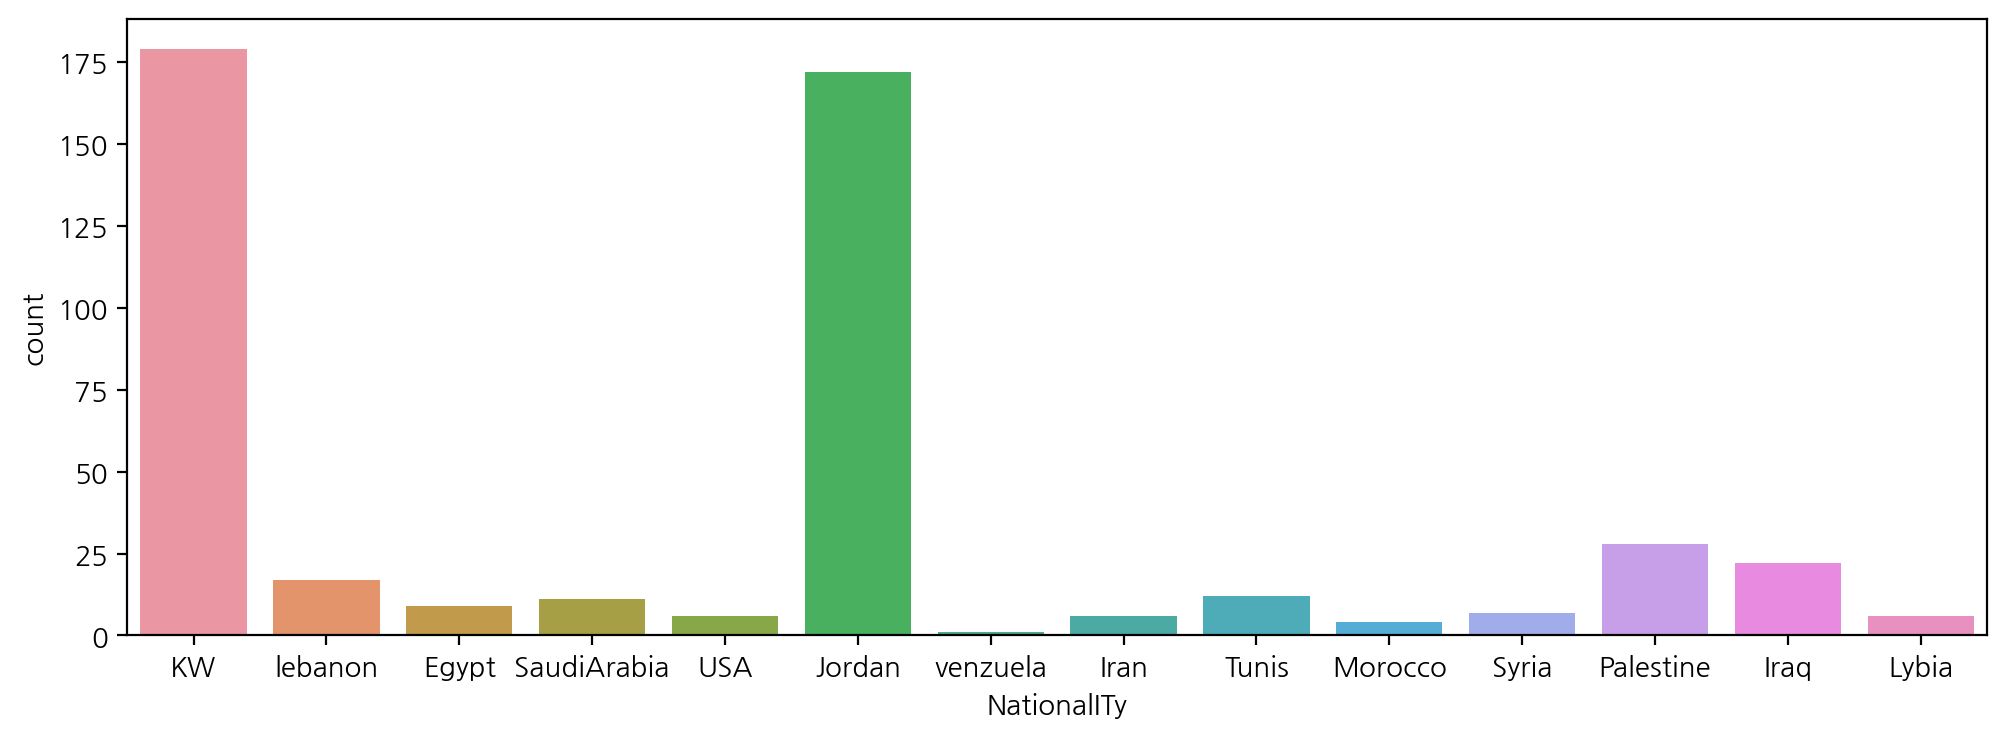

In [9]:
# 학생의 국적 빈도수
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='NationalITy')

<AxesSubplot:xlabel='GradeID', ylabel='count'>

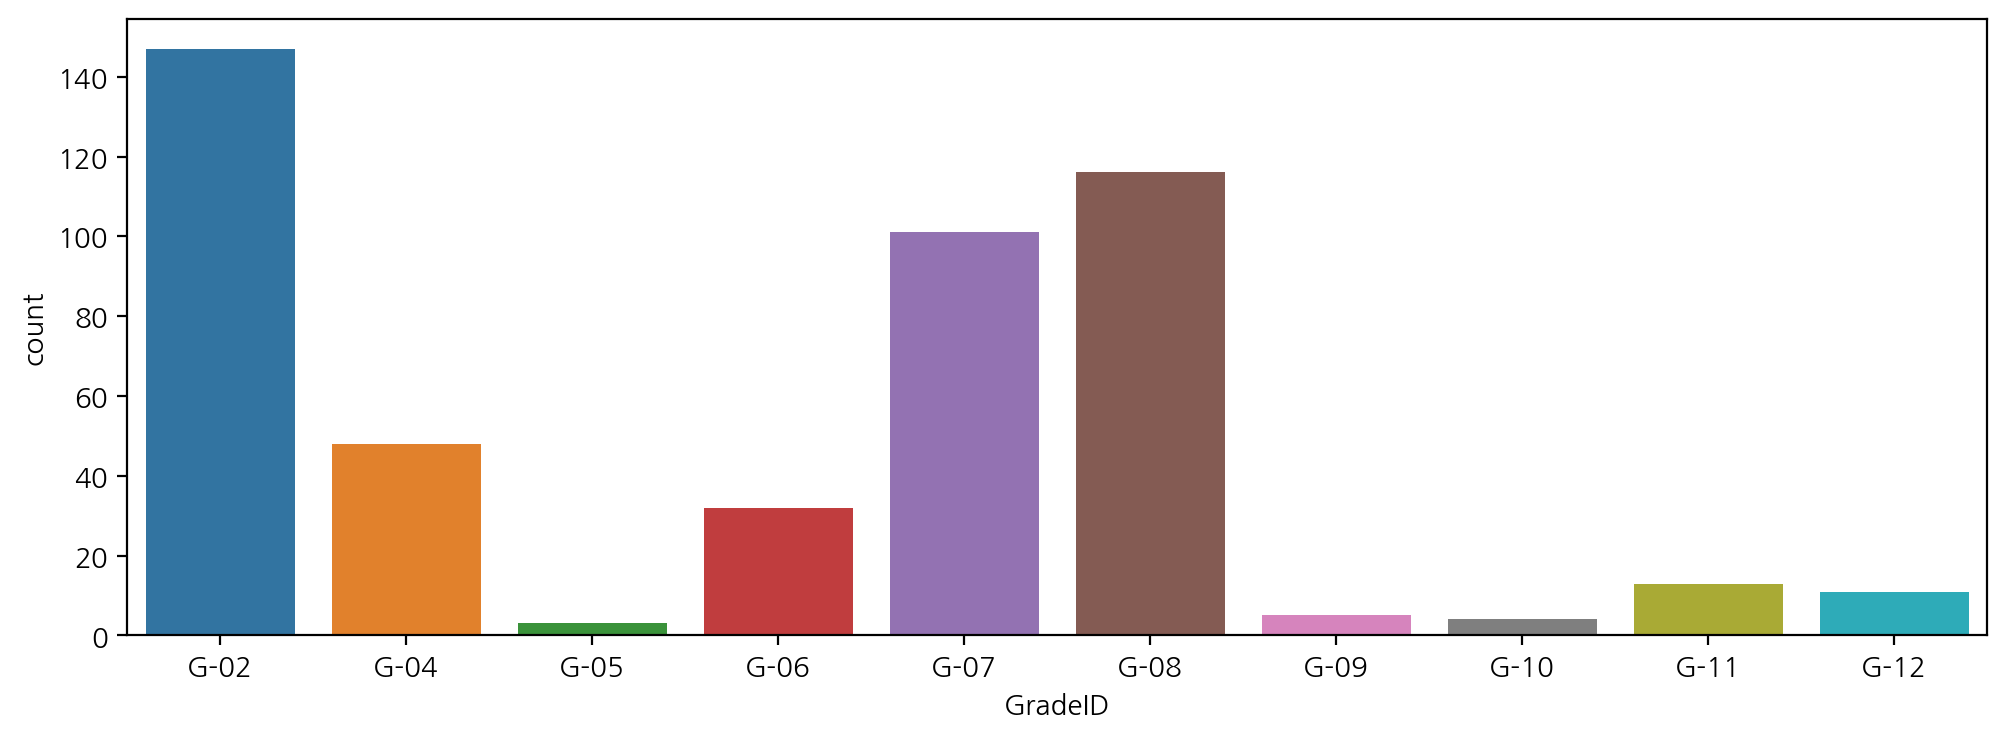

In [10]:
# Grade별 횟수
Grade = df['GradeID'].sort_values()
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x=Grade)

<AxesSubplot:xlabel='GradeID', ylabel='count'>

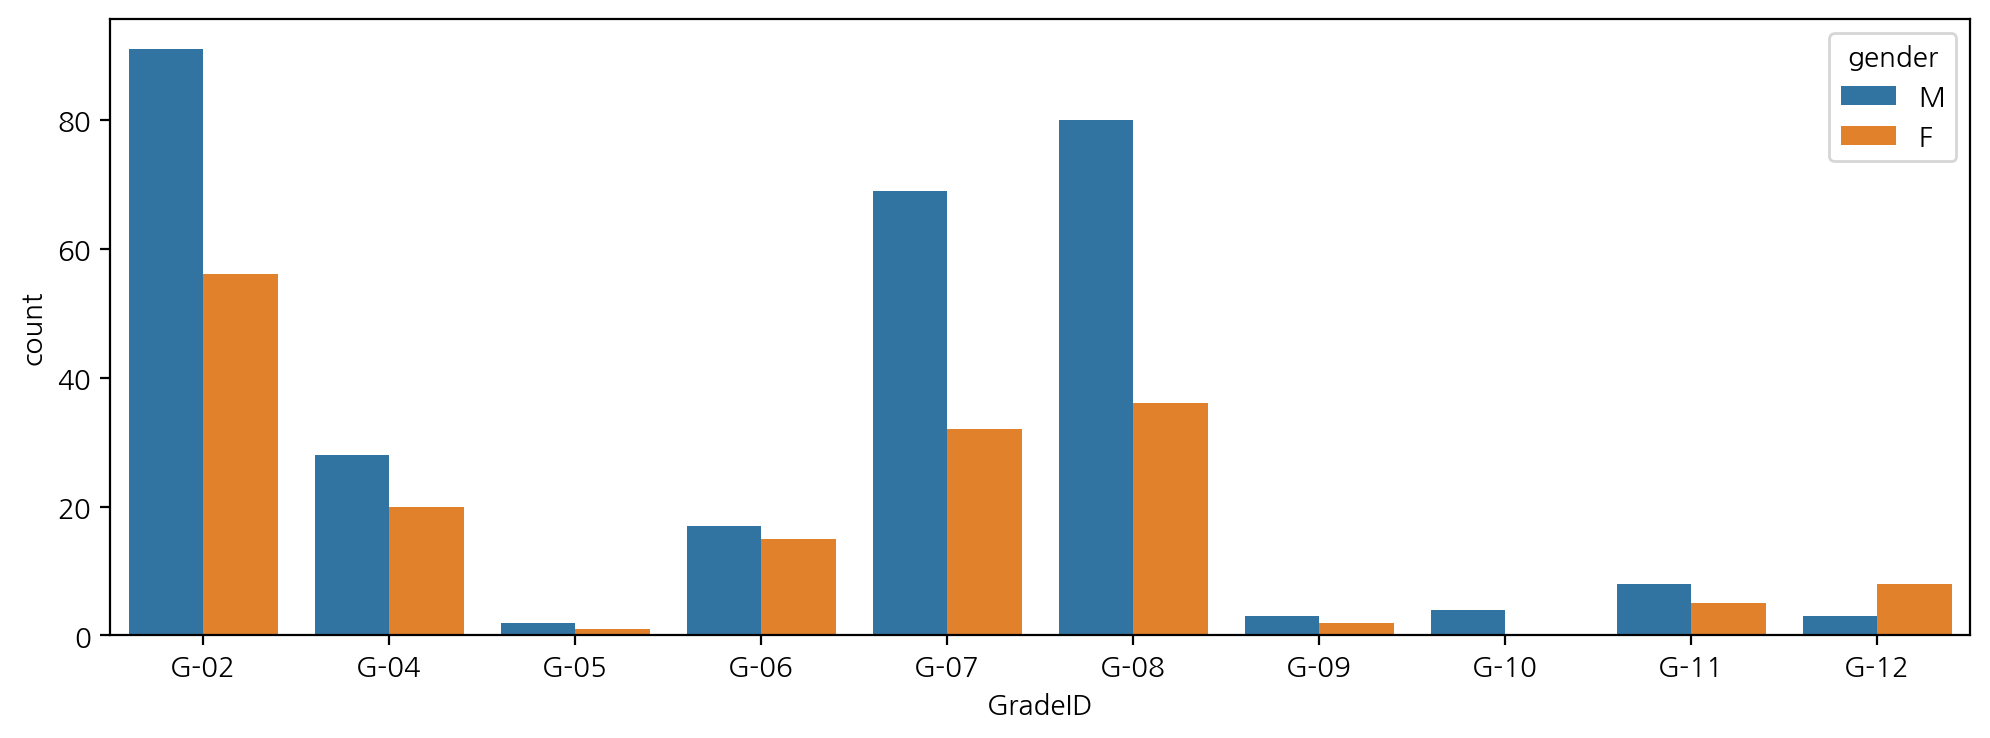

In [11]:
# 성별에 따른 등급
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x=Grade, hue='gender')

<AxesSubplot:xlabel='Topic', ylabel='count'>

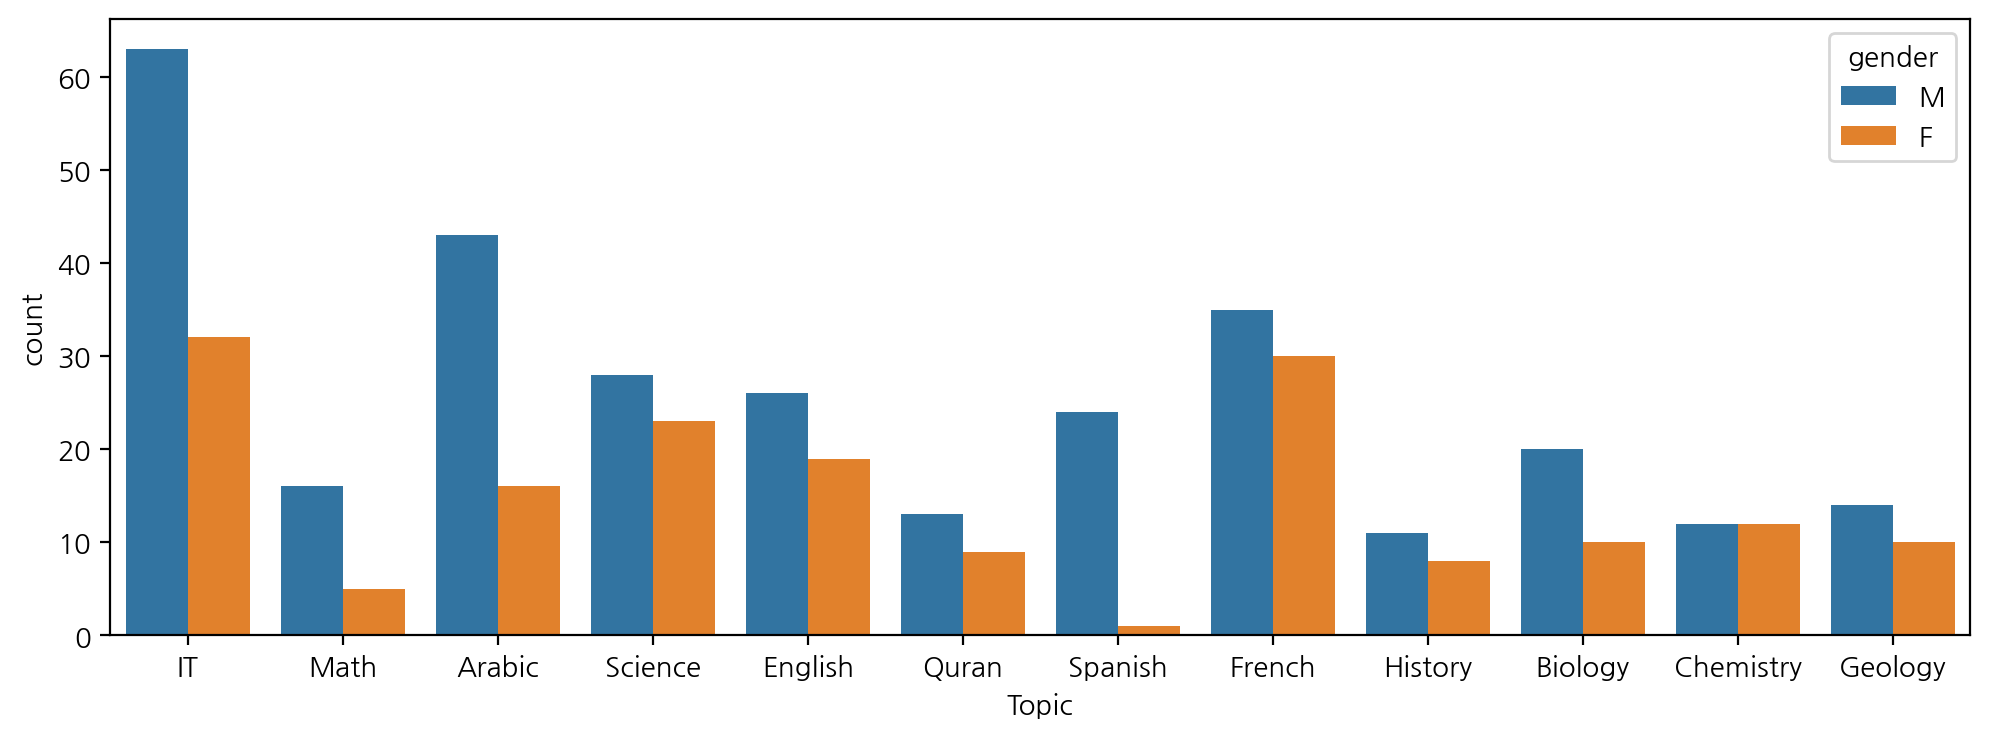

In [12]:
# 성별에 따른 수강과목 수
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Topic', hue='gender')

<AxesSubplot:xlabel='Relation', ylabel='count'>

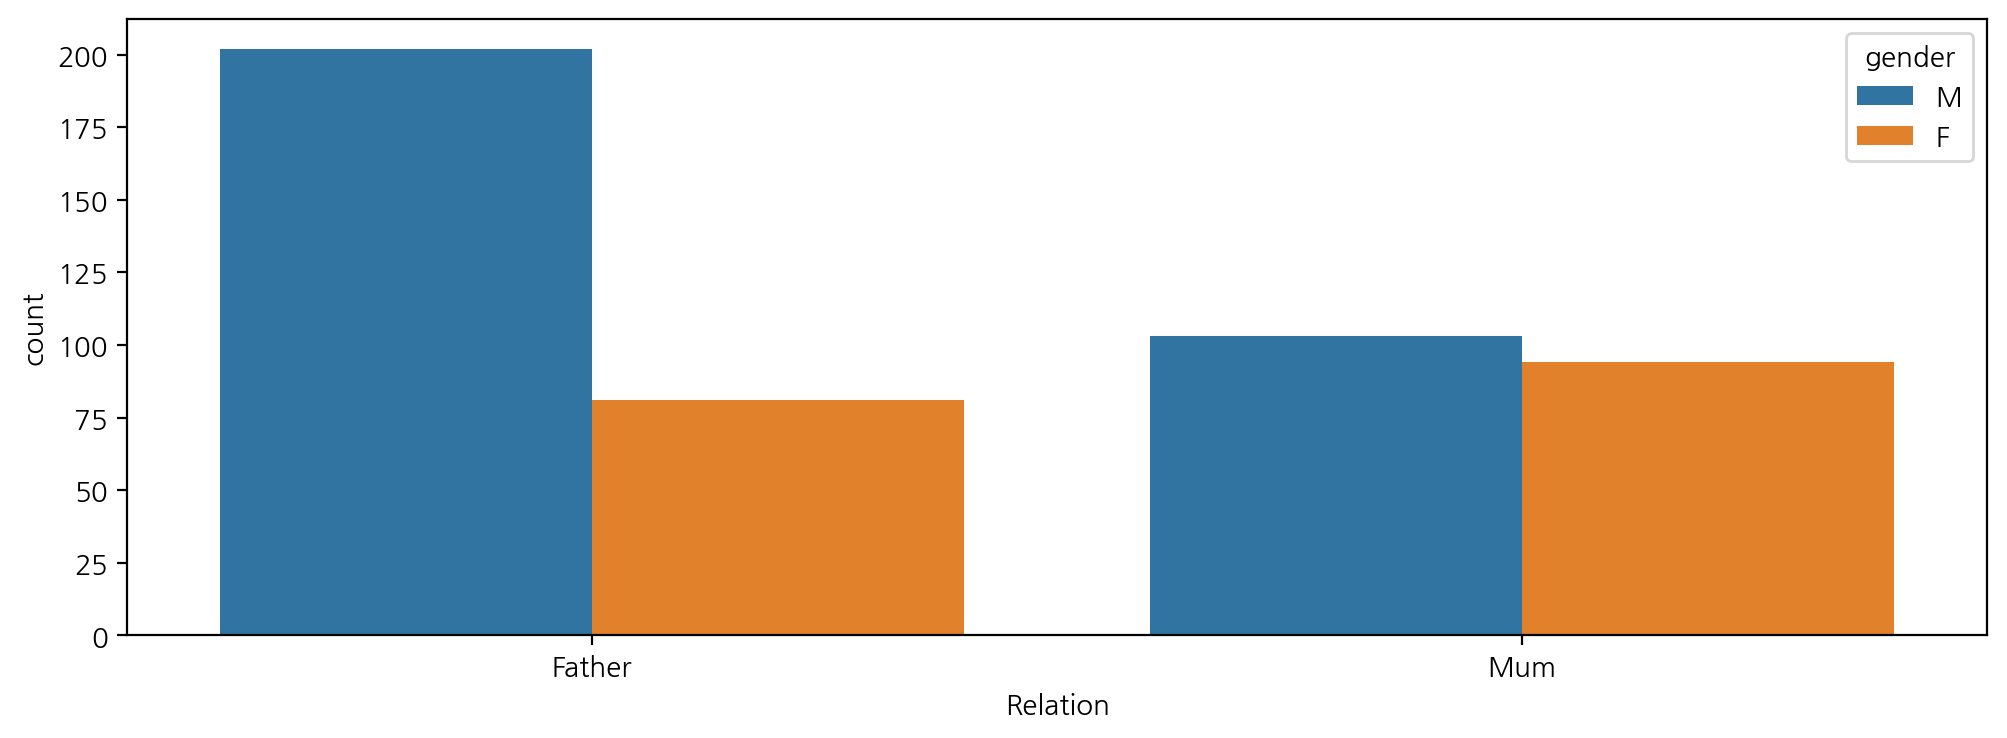

In [13]:
# 셩별에 따른 보호자-학생의 관계
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Relation', hue='gender')

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

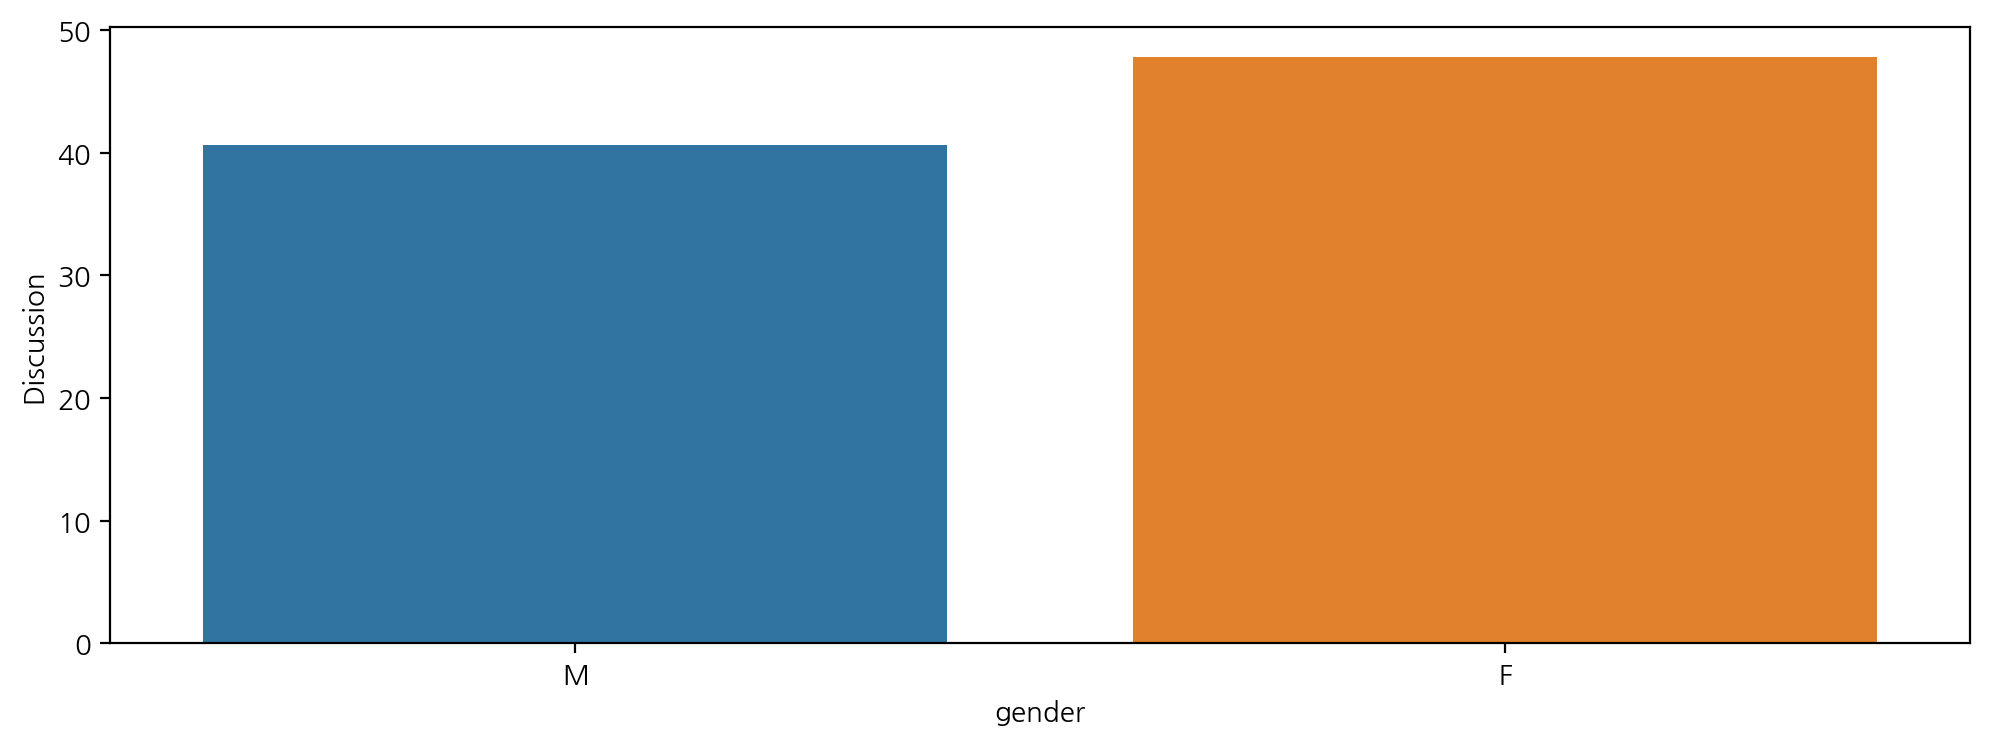

In [14]:
# 성별 토론 참여 횟수 
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='Discussion', x='gender', errorbar=None)

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

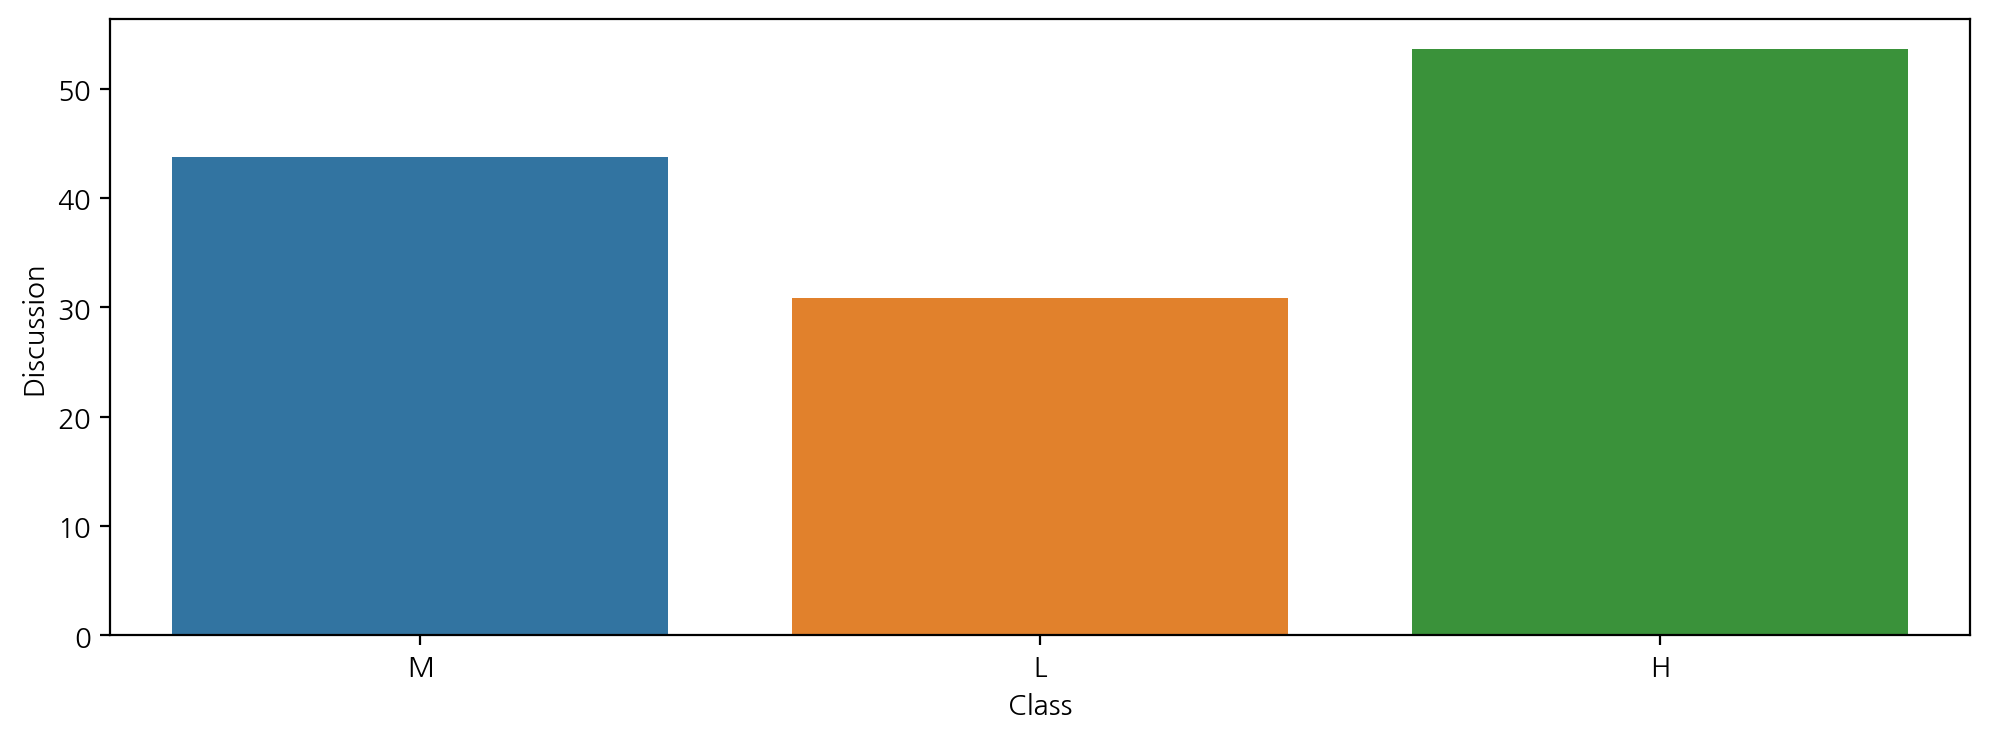

In [15]:
# Class별 토론 참여 횟수
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='Discussion', x='Class', errorbar=None)

<AxesSubplot:xlabel='Class', ylabel='AnnouncementsView'>

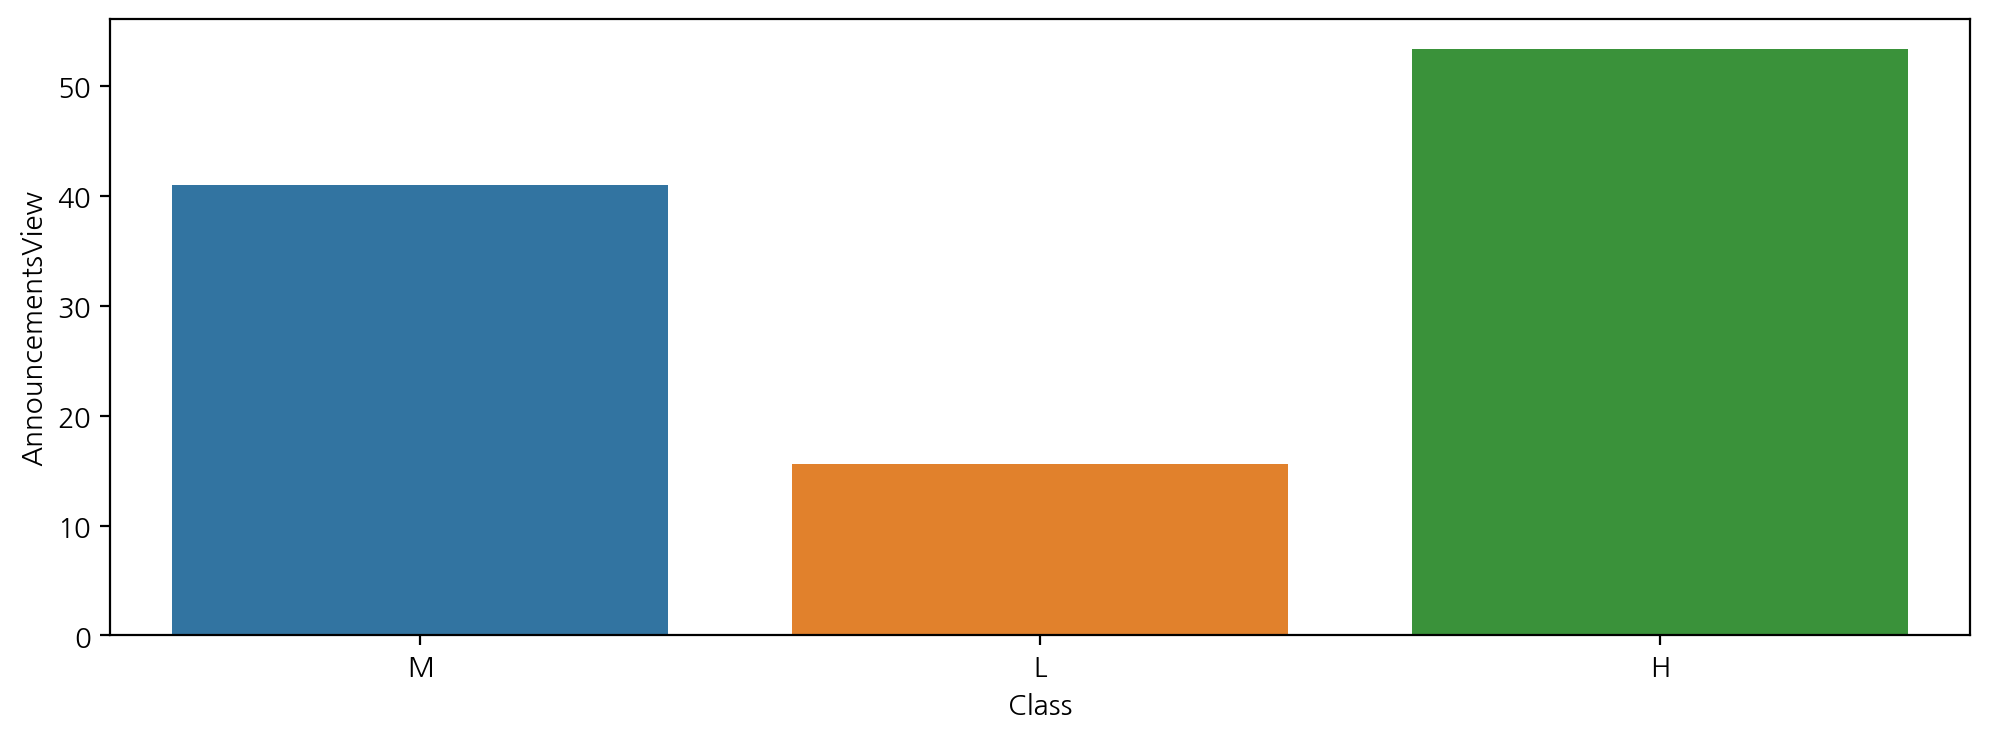

In [16]:
# Class별 과목 공지 확인 횟수 
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='AnnouncementsView', x='Class', errorbar=None)

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

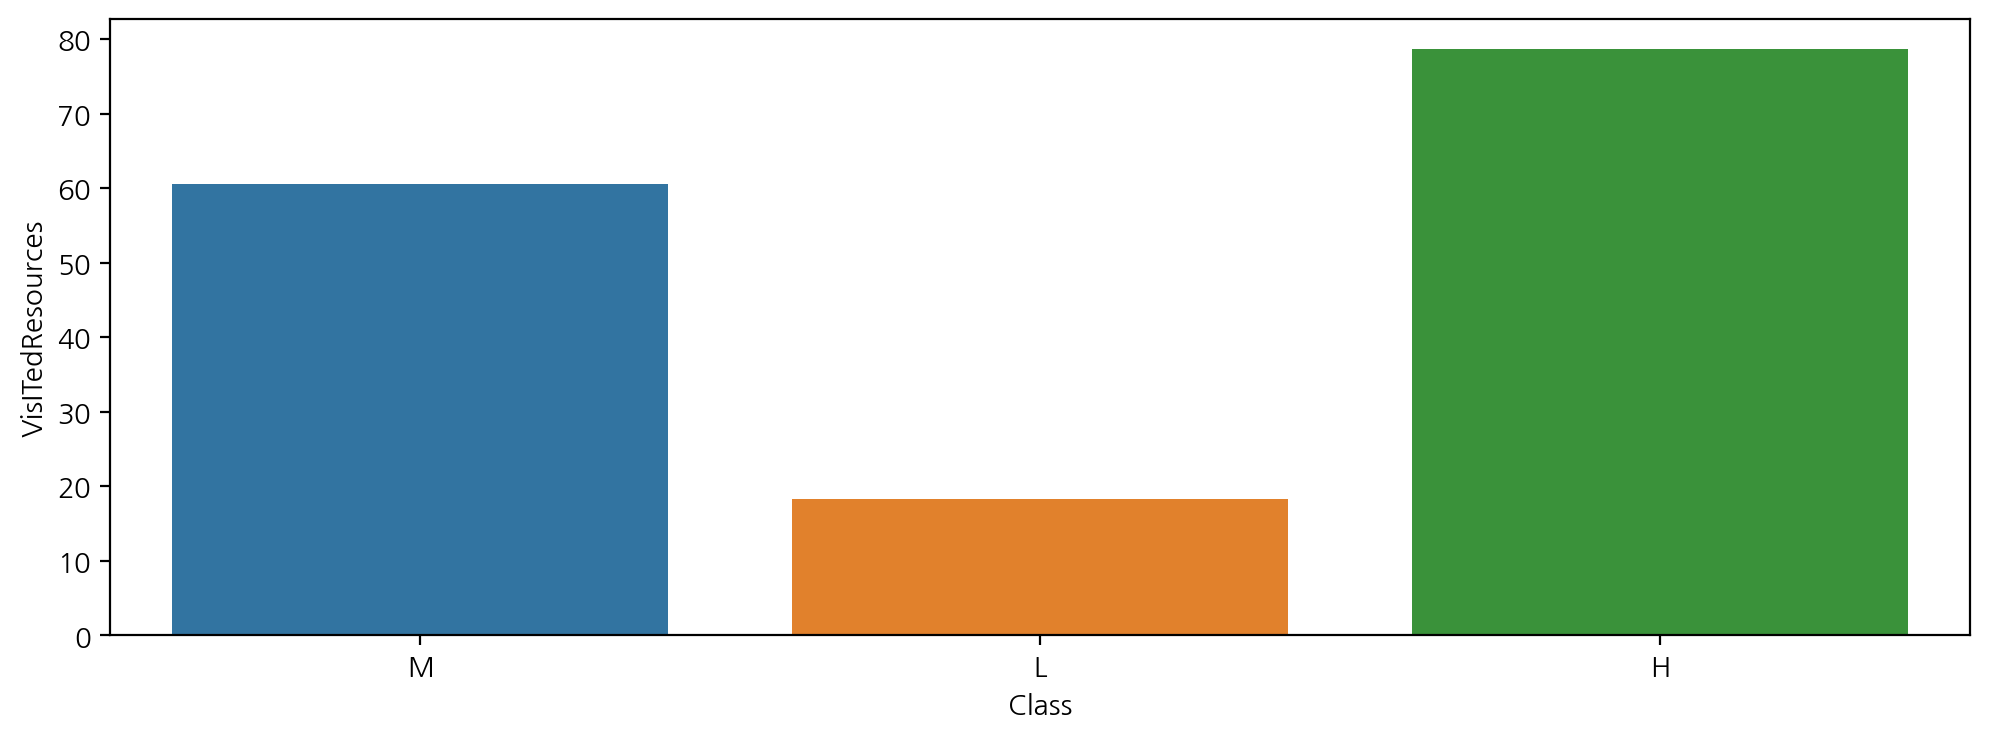

In [17]:
# Class별 코스 컨텐츠에 들어온 횟수
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='VisITedResources', x='Class', errorbar=None)

<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

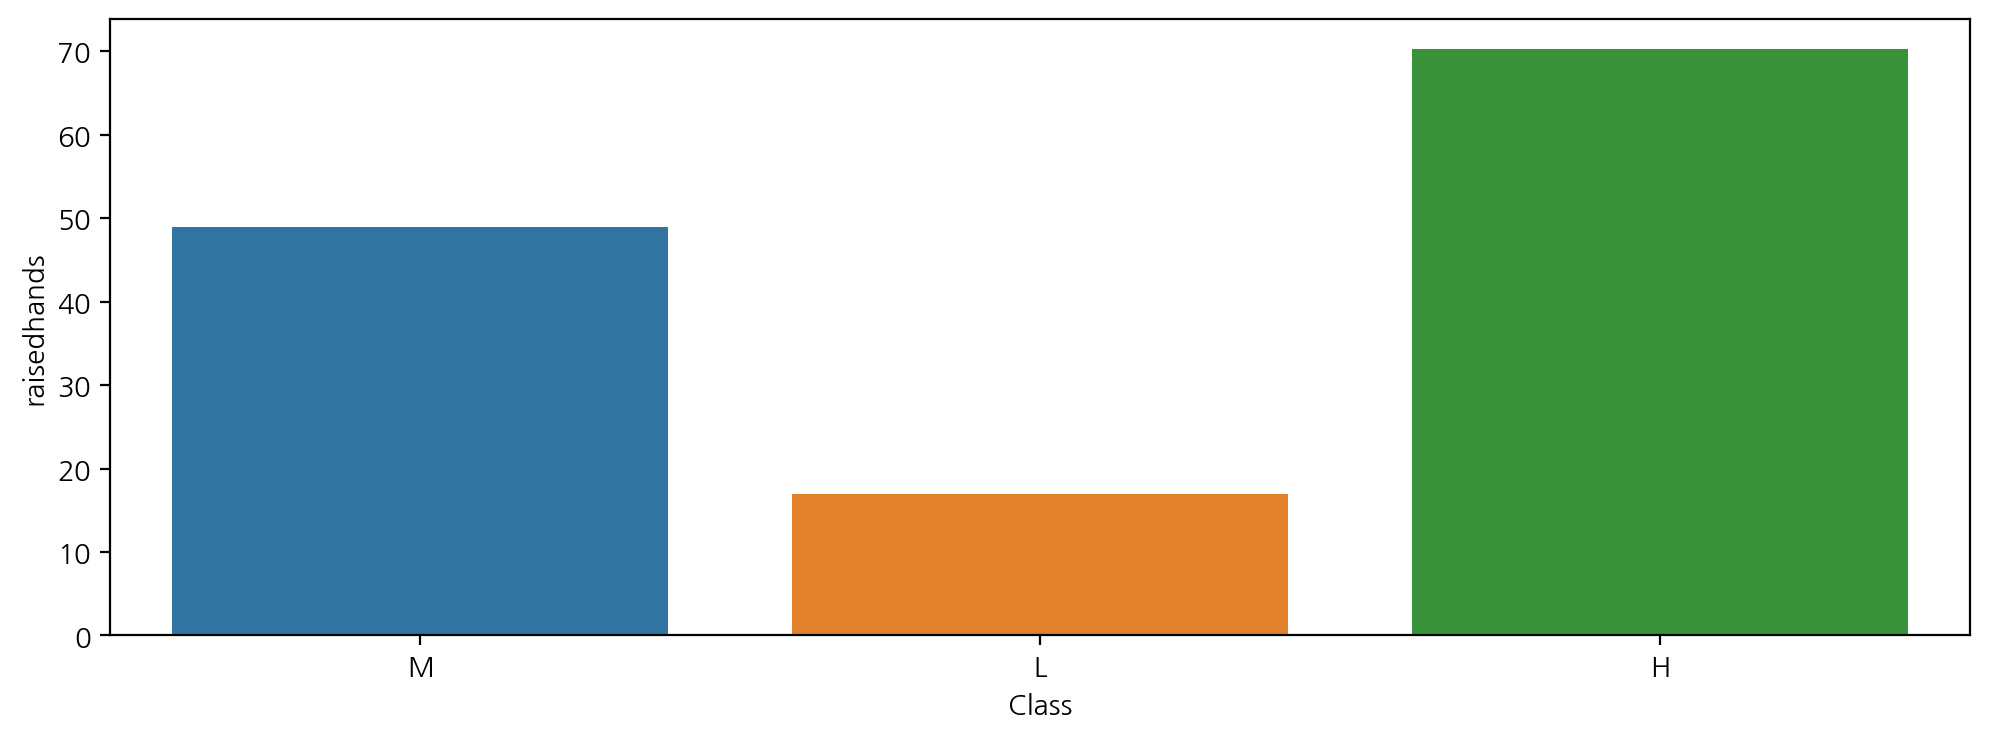

In [18]:
# Class별 수업 중 손 든 횟수
plt.figure(figsize=(12, 4))
sns.barplot(data=df, y='raisedhands', x='Class', errorbar=None)

## Feature Engineering

In [19]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [20]:
df['NationalITy'] = df['NationalITy'].str.replace('KW', 'KuwaIT')
df['NationalITy'] 

0      KuwaIT
1      KuwaIT
2      KuwaIT
3      KuwaIT
4      KuwaIT
        ...  
475    Jordan
476    Jordan
477    Jordan
478    Jordan
479    Jordan
Name: NationalITy, Length: 480, dtype: object

In [30]:
df["Topic"].unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [22]:
# df["Topic_fill"] = df["Topic"].copy()

In [23]:
# science = ['IT', 'Math', 'Science', 'Biology', 'Chemistry', 'Geology']
# df.loc[df["Topic"].isin(science),"Topic_fill"] = "S"
# df.loc[~df["Topic"].isin(science),"Topic_fill"] = "C"
# df[["Topic", "Topic_fill"]].sample(5)

In [31]:
class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
df = df.replace({"Class" : class_dict})


In [25]:
# df.loc[df["NationalITy"] == df["PlaceofBirth"], "immigration"] = "N"
# df.loc[df["NationalITy"] != df["PlaceofBirth"], "immigration"] = "Y"
# df[["NationalITy","PlaceofBirth","immigration"]].sample(10)

In [32]:
df[['gender', 'StageID',
    'Topic', 'Relation', 'raisedhands',
    'VisITedResources', 'AnnouncementsView',
    'Discussion', 'StudentAbsenceDays', 'Class']]

,gender,StageID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,lowerlevel,IT,Father,15,16,2,20,Under-7,0
1,M,lowerlevel,IT,Father,20,20,3,25,Under-7,0
2,M,lowerlevel,IT,Father,10,7,0,30,Above-7,-1
3,M,lowerlevel,IT,Father,30,25,5,35,Above-7,-1
4,M,lowerlevel,IT,Father,40,50,12,50,Above-7,0
...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,Chemistry,Father,5,4,5,8,Above-7,-1
476,F,MiddleSchool,Geology,Father,50,77,14,28,Under-7,0
477,F,MiddleSchool,Geology,Father,55,74,25,29,Under-7,0
478,F,MiddleSchool,History,Father,30,17,14,57,Above-7,-1


In [33]:
label_name = "Class"
label_name

'Class'

In [34]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Topic_fill'],
      dtype='object')

In [35]:
df = df.drop(columns=['NationalITy', 'PlaceofBirth', 'GradeID',
       'SectionID', 'Semester', 'ParentAnsweringSurvey'])
df.head()

,gender,StageID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class,Topic_fill
0,M,lowerlevel,IT,Father,15,16,2,20,Good,Under-7,0,IT
1,M,lowerlevel,IT,Father,20,20,3,25,Good,Under-7,0,IT
2,M,lowerlevel,IT,Father,10,7,0,30,Bad,Above-7,-1,IT
3,M,lowerlevel,IT,Father,30,25,5,35,Bad,Above-7,-1,IT
4,M,lowerlevel,IT,Father,40,50,12,50,Bad,Above-7,0,IT


In [ ]:
# df = df.rename(columns={'Topic_fill':'Topic'})
# df.columns

In [36]:
mod_df = pd.get_dummies(df)

In [37]:
mod_df.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'Class', 'gender_F', 'gender_M', 'StageID_HighSchool',
       'StageID_MiddleSchool', 'StageID_lowerlevel', 'Topic_Arabic',
       'Topic_Biology', 'Topic_Chemistry', 'Topic_English', 'Topic_French',
       'Topic_Geology', 'Topic_History', 'Topic_IT', 'Topic_Math',
       'Topic_Quran', 'Topic_Science', 'Topic_Spanish', 'Relation_Father',
       'Relation_Mum', 'ParentschoolSatisfaction_Bad',
       'ParentschoolSatisfaction_Good', 'StudentAbsenceDays_Above-7',
       'StudentAbsenceDays_Under-7', 'Topic_fill_Arabic', 'Topic_fill_Biology',
       'Topic_fill_Chemistry', 'Topic_fill_English', 'Topic_fill_French',
       'Topic_fill_Geology', 'Topic_fill_History', 'Topic_fill_IT',
       'Topic_fill_Math', 'Topic_fill_Quran', 'Topic_fill_Science',
       'Topic_fill_Spanish'],
      dtype='object')

In [38]:
mod_df.head(2)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,...,Topic_fill_Chemistry,Topic_fill_English,Topic_fill_French,Topic_fill_Geology,Topic_fill_History,Topic_fill_IT,Topic_fill_Math,Topic_fill_Quran,Topic_fill_Science,Topic_fill_Spanish
0,15,16,2,20,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,20,20,3,25,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# 'immigration_N', 'immigration_Y'
# 'StageID_HighSchool', 'StageID_MiddleSchool', 'StageID_lowerlevel'

In [39]:
feature_names = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_F', 'gender_M', 'Topic_Arabic',
       'Topic_Biology', 'Topic_Chemistry', 'Topic_English', 'Topic_French',
       'Topic_Geology', 'Topic_History', 'Topic_IT', 'Topic_Math',
       'Topic_Quran', 'Topic_Science', 'Topic_Spanish', 
                 'Relation_Father', 'Relation_Mum',
       'ParentschoolSatisfaction_Bad', 'ParentschoolSatisfaction_Good',
       'StudentAbsenceDays_Above-7', 'StudentAbsenceDays_Under-7'
         ]
feature_names

['raisedhands',
 'VisITedResources',
 'AnnouncementsView',
 'Discussion',
 'gender_F',
 'gender_M',
 'Topic_Arabic',
 'Topic_Biology',
 'Topic_Chemistry',
 'Topic_English',
 'Topic_French',
 'Topic_Geology',
 'Topic_History',
 'Topic_IT',
 'Topic_Math',
 'Topic_Quran',
 'Topic_Science',
 'Topic_Spanish',
 'Relation_Father',
 'Relation_Mum',
 'ParentschoolSatisfaction_Bad',
 'ParentschoolSatisfaction_Good',
 'StudentAbsenceDays_Above-7',
 'StudentAbsenceDays_Under-7']

In [40]:
train = mod_df[feature_names]
test = mod_df[label_name]
train.shape, test.shape

((480, 24), (480,))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

In [45]:
# pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00:00:010:01m
Note: you may need to restart the kernel to use updated packages.


In [68]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(max_depth=10, n_estimators=200)
model_xgb.fit(X_train, y_train)

pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [-1  0  1]

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=9, max_features=0.9, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

0.8333333333333334

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l2', 
                           C=1, 
                           max_iter = 100,
                           n_jobs=-1)
#                            solver="lbfgs",
#                            multi_class = "auto",
#                           random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8125

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=8,
                     weights='distance')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

0.8125

In [64]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier(max_depth= 5, 
                                max_features= 0.8, 
                                max_leaf_nodes= None, 
                                min_samples_leaf= 1, 
                                min_samples_split= 2)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

accuracy_score(y_test, y_predict)

0.8333333333333334

In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=0.9, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)

In [54]:
y_predict = model.predict(X_test)

In [55]:
max_depth = list(range(3, 20, 2))
max_features = [0.3, 0.5, 0.7, 0.8, 0.9]
parameters = {"max_depth" : max_depth, "max_features" : max_features}
parameters

{'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
 'max_features': [0.3, 0.5, 0.7, 0.8, 0.9]}

In [57]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5, scoring="accuracy", verbose=2)
clf.fit(X_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(clf.best_params_, 
                                                  clf.best_score_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.2s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.2s
[CV] END ......................max_depth=3, max

[CV] END .....................max_depth=11, max_features=0.3; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.3; total time=   0.3s[CV] END .....................max_depth=11, max_features=0.5; total time=   0.3s

[CV] END .....................max_depth=11, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.7; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=11, max_features=0.8; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.8; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.8; total time=   0.2s
[CV] END .....................max_depth=11, max_features=0.7; total time=   0.2s
[CV] END ...................

[CV] END .....................max_depth=19, max_features=0.7; total time=   0.2s
[CV] END .....................max_depth=19, max_features=0.7; total time=   0.2s
[CV] END .....................max_depth=19, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.7; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.5; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.7; total time=   0.2s
[CV] END .....................max_depth=19, max_features=0.8; total time=   0.2s
[CV] END .....................max_depth=19, max_features=0.7; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.8; total time=   0.3s
[CV] END .....................max_depth=19, max_features=0.8; total time=   0.2s
[CV] END ...................

In [58]:
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, max_features=0.8, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)

In [59]:
y_predict = best_model.predict(X_test)
y_predict[:5]

array([-1, -1,  1,  0,  1])

In [60]:
model.feature_importances_

array([0.12865485, 0.27518162, 0.12615861, 0.08926127, 0.01708628,
       0.01562835, 0.00721315, 0.00037202, 0.00547211, 0.00511418,
       0.00863584, 0.0085238 , 0.00227009, 0.00622309, 0.00454217,
       0.00219832, 0.00201285, 0.00049458, 0.0290449 , 0.0298791 ,
       0.00806886, 0.01049847, 0.106094  , 0.1113715 ])

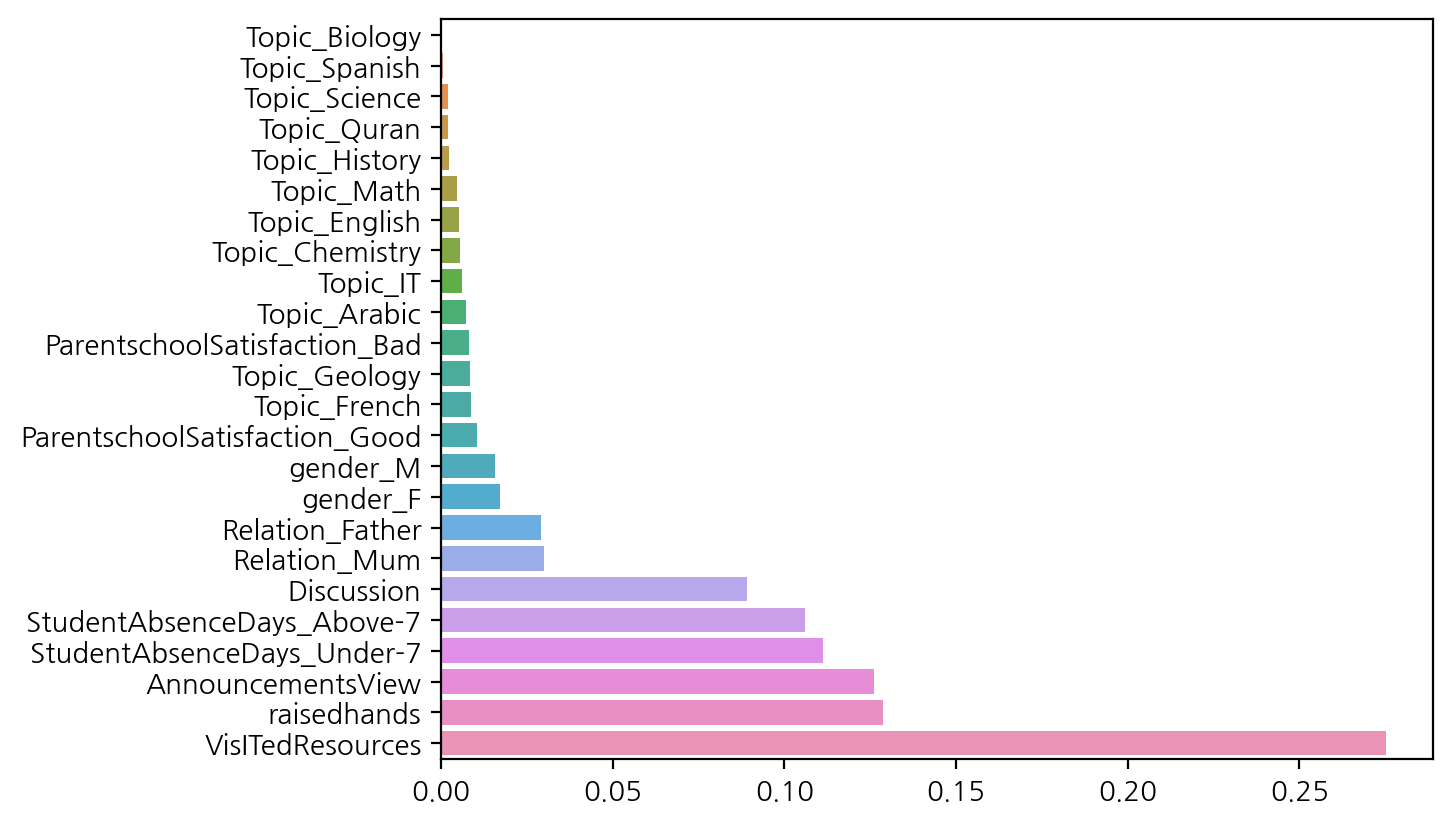

In [61]:
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_in_
fi = fi.sort_values()

sns.barplot(x=fi, y=fi.index);

In [62]:
(y_test == y_predict).mean()

0.8333333333333334

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8333333333333334